<a href="https://colab.research.google.com/github/Milena883/Algorithmization-and-programming_Vishnevskaya/blob/main/Diffusion_models_for_conditional_MRI_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


В этой статье мы представляем модель латентной диффузии (LDM) для генерации магнитно-резонансной томографии (МРТ) мозга, обуславливающею генерацию на основе патологии (здоровый, глиобластома, склероз, деменция) и методов получения (T1w, T1ce, T2w, Flair, PD). Для оценки качества полученных изображений используются метрики начального расстояния Фрейшера (FID) и индекса многомасштабного структурного сходства (MS-SSIM). Результаты показывают, что модель генерирует изображения с распределением, аналогичным реальному, сохраняя баланс между визуальной точностью и разнообразием. Кроме того, модель демонстрирует возможность экстраполяции, позволяя генерировать конфигурации, которые не присутствовали в обучающих данных.

Результаты подтверждают потенциал модели для увеличения числа выборок в клинических наборах данных, балансировки недостаточно представленных классов и оценки модели ИИ в медицине, способствуя развитию диагностических инструментов радиологии без нарушения конфиденциальности пациентов.

Ключевые слова: ИИ, искусственный интеллект, медицинский искусственный интеллект, генеративные модели, генерация изображений


# **1. Введение**

Искусственный интеллект (ИИ) преобразил анализ медицинских изображений, обеспечивая автоматизацию задач диагностики и сегментации с беспрецедентной точностью. Однако разработка моделей ИИ в этой области сталкивается со значительными трудностями из-за дефицита клинических данных, строгих правил конфиденциальности и высоких затрат, связанных с аннотированием и маркировкой. Сбор больших объемов медицинских данных является сложным и дорогостоящим процессом, ограниченным трудностью доступа к репрезентативным изображениям различных патологий и Modalities МРТ. Кроме того, такие правила, как Общие данные о защите информации (GDPR), накладывают дополнительные ограничения на использование медицинских данных.
Регламент по защите персональных данных (GDPR) в Европе и Закон США о защите персональных данных (ADPPA) в США ограничивают использование и обмен медицинскими данными, что сужает доступ к обширным и разнообразным базам данных. Для решения этих проблем ключевой стратегией стала генерация медицинских изображений. Создавая искусственные данные, которые имитируют характеристики реальных изображений, генеративные модели позволяют расширять наборы данных без ущерба для конфиденциальности пациентов, облегчают оценку моделей ИИ и улучшают представление редких патологий. В этом контексте были разработаны многочисленные подходы к генерации медицинских изображений, среди которых выделяются генеративные состязательные сети (GAN) и диффузионные модели (DM).

Хотя эти модели доказали свою эффективность при создании изображений, они имеют такие ограничения, как высокая вычислительная стоимость, зависимость от обучающих данных и отсутствие обобщения и разнообразия в создаваемых изображениях. В этой работе мы предлагаем модель, основанную на моделях латентной диффузии (LDM) для условной генерации МРТ, позволяющую специфицировать как патологию, так и модальность получения. Этот подход оптимизирует процесс генерации изображений, выполняя диффузию в сжатом латентном пространстве, что снижает вычислительную нагрузку без ущерба для визуального качества. Модель способна генерировать изображения в любой комбинации патологии и модальности, даже в конфигурациях, отсутствующих в обучающих данных, демонстрируя ее экстраполяционную способность и потенциал для улучшения разнообразия медицинских наборов данных.

Генерация обусловленных синтетических медицинских изображений даёт множество преимуществ. Во-первых, она увеличивает разнообразие клинических наборов данных, облегчая обучение моделей ИИ с более широким представлением клинических случаев. Кроме того, она помогает смягчить дисбаланс данных, генерируя изображения для патологий и модальностей, которые недостаточно представлены в реальных данных. Она также облегчает проверку диагностических моделей, создавая синтетические данные для контроля и тестирования и, наконец, обеспечивает конфиденциальность пациента, поскольку сгенерированные данные не содержат идентифицируемой информации.

Оставшаяся часть статьи организована следующим образом. В разделе 2 описывается предлагаемая модель для генерации обусловленных синтетических медицинских изображений, подробно описывается её архитектура и рабочий процесс. В разделе 3 представлены эксперименты и результаты, включая оценку качества изображений с использованием количественных показателей и визуальных примеров. Наконец, в разделе 4 обсуждаются выводы и будущие направления исследований, подчеркивается значимость модели и потенциальные приложения в области ИИ для медицины.


# **2. Решение**

**2.1 Генеративные модели и ИИ в обработке изображений**

Генерация медицинских изображений с использованием искусственного интеллекта значительно эволюционировала, что привело к появлению множества подходов, которые продемонстрировали свою эффективность в этой области. Среди наиболее часто используемых моделей выделяются: генеративные состязательные сети (GAN), вариационные автокодировщики (VAE), потоковые модели и диффузионные модели (DM), каждая из которых имеет определенные характеристики, делающие её пригодной для различных приложений.
Особенно эффективным подходом является Latent Diffusion Model (LDM), которая оптимизирует генерацию изображений, выполняя диффузию в сжатом латентном пространстве. Этот подход снижает вычислительную нагрузку без ущерба для визуального качества, что делает его идеальным вариантом для синтеза медицинских изображений, обусловленных патологией и модальностью.
Основные характеристики этих подходов представлены ниже:
GAN: Они используют две конкурирующие нейронные сети в состязательной структуре: генератор, который создает синтетические изображения, и дискриминатор, который пытается различить реальные и сгенерированные изображения. Благодаря этому подходу GAN широко используются в синтезе медицинских изображений и улучшении разрешения. Однако они страдают от коллапса режимов, когда генератор создает только подмножество изображений, и нестабильности обучения, что может помешать сходимости модели.

VAE: Они моделируют скрытое распределение данных, позволяя генерировать новые изображения путем выборки из этого распределения. Они состоят из кодера, который сжимает изображение в скрытое пространство, и декодера, который его реконструирует. Их главное преимущество — стабильность в обучении, поскольку они не полагаются на состязательную стратегию. Однако сгенерированные изображения, как правило, менее четкие по сравнению с теми, которые производятся GAN, поскольку они оптимизируют реконструкцию в вероятностных терминах.
Модели на основе потоков: Они применяют обратимые преобразования для моделирования вероятности данных, что позволяет точно контролировать атрибуты генерируемых изображений. В отличие от других моделей, они могут вычислять точную вероятность каждого образца, облегчая его интерпретацию. Они не страдают от коллапса режимов, но их высокая вычислительная стоимость и сложная архитектура делают их менее эффективными для обучения и генерации изображений.
Модели диффузии (DM): Эти модели генерируют изображения путем итеративного удаления шума из случайного распределения, постепенно очищая образец от шума в направлении реалистичного изображения. Они очень эффективны при синтезе высококачественных изображений и не страдают от проблем с коллапсом режимов. Однако их основным ограничением является высокая вычислительная стоимость, поскольку для генерации изображения требуется несколько шагов вывода.


Процесс прямой диффузии описывается следующим образом:

\[ q(x_t | x_{t-1}) = \mathcal{N}(x_t; \alpha_t x_{t-1}, (1 - \alpha_t) I) \tag{1} \]

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def q_xt_given_xt_minus_1(x_t_prev, alpha_t):
    mean = alpha_t * x_t_prev
    covariance = (1 - alpha_t) * np.identity(len(x_t_prev))

    # Генерация образца из нормального распределения
    x_t_sample = multivariate_normal.rvs(mean=mean, cov=covariance)
    return x_t_sample

# Пример использования
x_t_prev = np.array([1.0, 2.0])  # Например, предыдущий вектор состояния
alpha_t = 0.5  # Коэффициент
sampled_x_t = q_xt_given_xt_minus_1(x_t_prev, alpha_t)

print("Сгенерированный образец x_t:", sampled_x_t)

Сгенерированный образец x_t: [1.58426468 0.72633605]


где \( x_t \) представляет изображение на временном шаге \( t \), \( \alpha_t \) управляет графиком шума, а \( I \) — единичная матрица.

Обратный процесс вычисляется у удаления шума за шагом:

\[ p(x_{t-1} | x_t) = \mathcal{N}(x_{t-1}; \mu_\theta(x_t, t), \Sigma_\theta(x_t, t)) \tag{2} \]


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def mu_theta(x_t, t):
    # Пример функции для вычисления среднего
    return x_t - 0.5 * t  # Это пример; замените на вашу собственную реализацию.

def sigma_theta(x_t, t):
    # Пример функции для вычисления ковариационной матрицы
    return np.identity(len(x_t)) * (1 + 0.1 * t)  # Это пример; замените на вашу собственную реализацию.

def p_xt_minus_1_given_xt(x_t, t):
    mean = mu_theta(x_t, t)
    covariance = sigma_theta(x_t, t)

    # Генерация образца из нормального распределения
    x_t_minus_1_sample = multivariate_normal.rvs(mean=mean, cov=covariance)
    return x_t_minus_1_sample

# Пример использования
x_t = np.array([1.0, 2.0])  # Например, текущий вектор состояния
t = 1  # Шаг времени
sampled_x_t_minus_1 = p_xt_minus_1_given_xt(x_t, t)

print("Сгенерированный образец x_{t-1}:", sampled_x_t_minus_1)

Сгенерированный образец x_{t-1}: [-0.88606083  0.95951937]


где \( \mu_\theta \) и \( \Sigma_\theta \) — прогнозируемое среднее значение и дисперсия очищенного от шума изображения на каждом шаге.
Модели скрытой диффузии (LDM) объединяют модели диффузии с автоэнкодерами, позволяя им работать в сжатом скрытом пространстве вместо полных изображений. Это оптимизирует процесс синтеза изображений, снижая вычислительные затраты без ущерба для визуального качества. В этой работе мы исследуем роль LDM в создании условных медицинских изображений, подчеркивая их способность адаптироваться к множественным патологиям и модальностям.


# **3. Предлагаемое решение**

Модель, предложенная в этой работе, представляет собой модель скрытой диффузии (LDM), разработанную для создания условной магнитно-резонансной томографии (МРТ). Как было проанализировано в экспериментах, генерация изображений выполняется с помощью схемы кондиционирования, позволяющей специфицировать как патологию (здоровье, глиобластома, склероз, деменция), так и модальность МРТ (T1w, T1ce, T2w, FLAIR, PD).
Такой подход позволяет создавать медицинские изображения с точным контролем их характеристик, что упрощает создание синтетических МРТ-сканов в определённых конфигурациях. Например, модель может генерировать изображение здорового мозга в модальности T1w или МРТ мозга с рассеянным склерозом в модальности FLAIR, гарантируя, что анатомическая структура и внешний вид соответствуют заданным параметрам.
Поскольку реализация модели является частью интеллектуальной собственности компании, внутренние подробности её работы и конкретного процесса обучения не будут раскрыты. Тем не менее, даётся общее описание её архитектуры и рабочего процесса, объясняющее ключевые компоненты на этапах обучения и вывода.
Предлагаемая модель основана на архитектуре скрытой диффузии, где генерация изображения происходит в сжатом скрытом пространстве, а не напрямую с исходным изображением. Это позволяет проводить эффективную реконструкцию с меньшими вычислительными затратами. Система состоит из трёх основных модулей:
-Кодировщик: преобразует изображение МРТ в компактное скрытое представление, уменьшая размерность и облегчая обработку модели. Кодировщик отображает входное изображение \( x \) в скрытое пространство \( z \), параметры которого заданы средним значением \( \mu(x) \) и дисперсией \( \sigma^2(x) \):

\[q(z|x) = \mathcal{N}(z; \mu(x), \sigma^2(x)) \tag{3}\]


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def mu(x):
    # Пример функции для вычисления среднего
    return x * 0.5  # Измените на вашу реализацию.

def sigma_squared(x):
    # Пример функции для вычисления дисперсии
    return np.ones_like(x) * 0.1  # Example where variance is a constant; replace with your logic.

def q_z_given_x(x):
    mean = mu(x)
    variance = sigma_squared(x)
    covariance = np.diag(variance)  # Преобразование в ковариационную матрицу

    # Генерация образца из нормального распределения
    z_sample = multivariate_normal.rvs(mean=mean, cov=covariance)
    return z_sample

# Пример использования
x = np.array([1.0, 2.0])  # Например, вектор наблюдений
sampled_z = q_z_given_x(x)

print("Сгенерированный образец z:", sampled_z)

Сгенерированный образец z: [0.12342446 0.86071312]


Сеть U-Net с DDPM: В процессе обучения диффузионной модели мы начинаем с чистого скрытого представления \( z_0 \). Гауссовский шум постепенно добавляется в соответствии с предопределённым графиком для генерации шумного скрытого \( z_t \) на каждом временном шаге \( t \):

\[z_t = \bar{\alpha}_t z_0 + \frac{1}{\bar{\alpha}_t} \epsilon,\]


где \( \epsilon \sim \mathcal{N}(0, I) \) — гауссовский шум, а \( \bar{\alpha}_t \) — кумулятивное произведение коэффициентов графика шума. Условная сеть U-Net получает шумовую скрытую информацию \( z_t \), временной шаг \( t \) и дополнительную информацию об условиях (такую как патология или модальность) для прогнозирования добавленного шума, обозначаемого как \[ \epsilon_\theta(z_t, t) \] — это остаточный шум, который U-Net учится точно предсказывать. Цель обучения — минимизировать ошибку между истинным шумом \( \epsilon \) и прогнозом сети U-Net:

\[L = \mathbb{E}_{z_0, \epsilon, t} \left[ \| \epsilon - \epsilon_\theta(z_t, t) \|^2 \right].\]



Оптимизируя эти потери, U-Net обучается точно предсказывать остаточный шум.
Декодер: Реконструирует окончательное синтетическое изображение из уточнённого скрытого пространства, генерируя МРТ с указанными характеристиками. Декодер отображает скрытый вектор \( z \) обратно в пространство изображений \( \hat{x} \) через изученное преобразование \( p(x|z) \):

\[\hat{x} = g_\theta(z) \tag{4}\]


где \( g_\theta \) — функция декодера, параметризованная нейронной сетью.
Использование сжатых скрытых пространств повышает эффективность вычислений без ущерба для визуального качества генерируемых изображений. Модель обучается с использованием схемы диффузии в скрытом пространстве, что позволяет нейронной сети научиться восстанавливать синтетические изображения из ухудшенного представления.
Эта схема, показанная на рисунке 1, позволяет модели изучать анатомические закономерности на основе обучающих данных, гарантируя, что генерируемые изображения реалистичны и отражают различные клинические конфигурации.


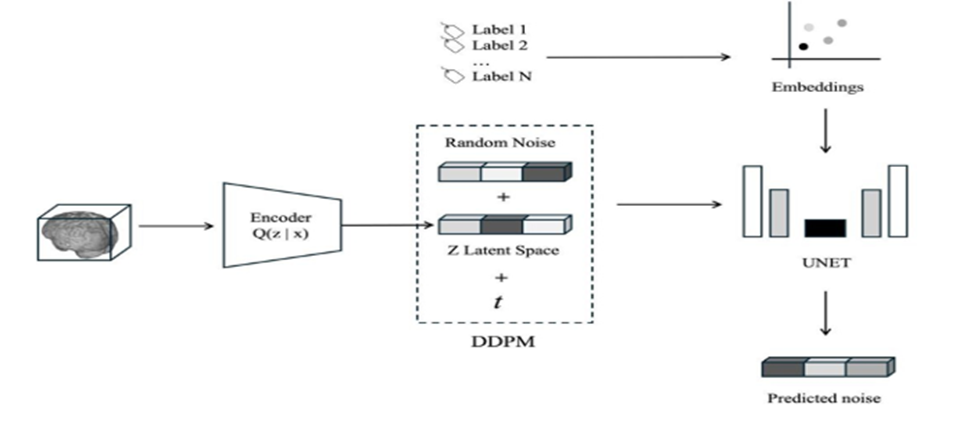

Рисунок 1: Схема процесса обучения генеративной модели.
Вывод с DDIM: После обучения модель может генерировать новые синтетические изображения без необходимости реального входного изображения. Во время вывода выполняется упрощённый процесс по сравнению с обучением:
Случайная инициализация скрытого пространства: В скрытом пространстве генерируется случайная начальная точка.
Кондиционирование: Вводится соответствующее внешнее значение для желаемой патологии и модальности.
Выборка DDIM: Применяется детерминированный метод DDIM (Denoising Diffusion Implicit Model), который очищает скрытое пространство шума путём итеративного прогнозирования и удаления шума:

\[z_{t-1} = \frac{1}{\alpha_t} \left( z_t - \frac{\alpha_{t-1}}{\alpha_t} \epsilon_\theta(z_t, t) \right) + \sigma_t \epsilon\tag{5}\]


где \( z_t \) — скрытая переменная на временном шаге \( t \), \( \alpha_t \) управляет графиком шума, а \( \sigma_t \) — коэффициент масштабирования шума.

Реконструкция с помощью декодера: Уточнённое скрытое представление реконструируется в окончательное изображение с исходными доменами МРТ.
Этот процесс, проиллюстрированный на рисунке 2, позволяет создавать высококачественные синтетические изображения, сохраняя реалистичные анатомические структуры и гарантируя точное отражение спецификаций кондиционирования.


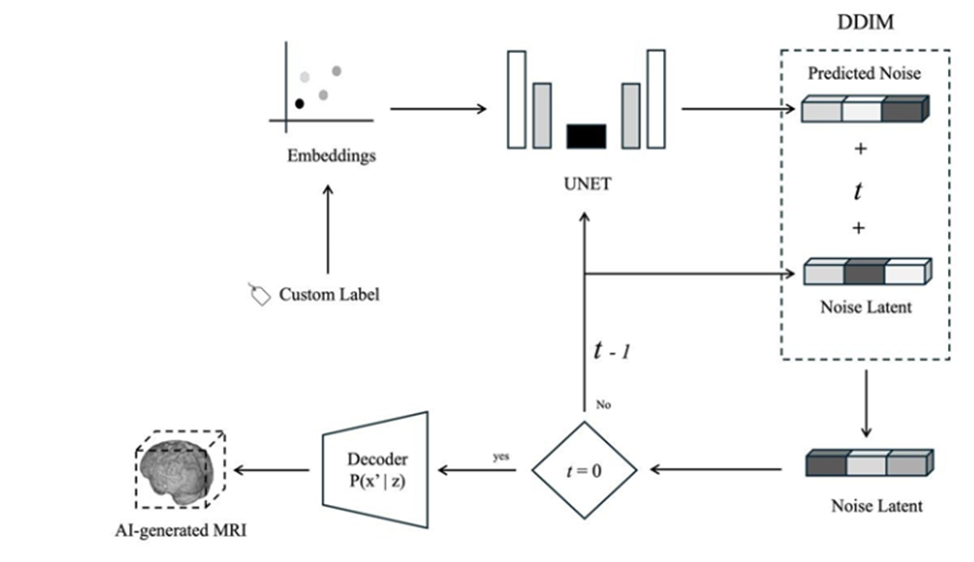

# **4. Эксперименты и результаты**

**4.1 Наборы данных**

Для оценки производительности модели генератора, обученных на медицинских изображениях, использовались различные наборы данных МРТ головного мозга, представляющие различные патологии и методы получения изображений в разных модальностях. Выбор этих наборов данных был направлен на обеспечение надежной оценки модели в множественных клинических условиях. Используемые данные были получены из четырёх основных источников:
- IXI и OASIS (для здоровых субъектов и деменции)
- BRATS2021 (глиобластома)
- ISBI 2015 Challenge вместе с открытыми данными по МС (рассеянный склероз)
Таблица 1 суммирует характеристики каждого набора данных, включая представленную патологию и доступные модальности.


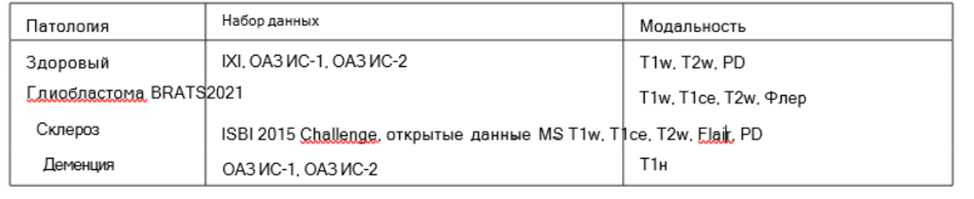

Таблица 1: Наборы данных, использованные для оценки модели.
В таблице 2 представлено распределение изображений по патологиям и модальностям МРТ, а в таблице 3 — процентное представление этих изображений в наборе данных.
В общей сложности использованный набор данных состоит из 5996 снимков МРТ, распределённых по различным патологиям и модальностям. Однако наблюдается дисбаланс в распределении изображений, так как некоторые патологии имеют большую представленность, чем другие. В частности, существует значительно большее количество изображений, доступных для здоровых субъектов и пациентов с глиобластомой, в то время как изображения, соответствующие рассеянному склерозу и деменции, значительно ниже.


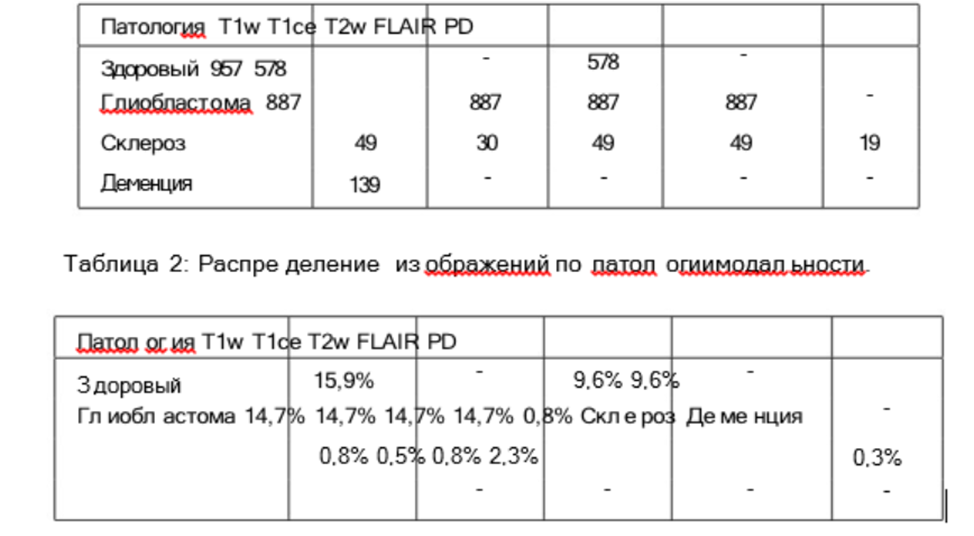

Таблица 3: Процентное распределение изображений по патологии и модальности.
Этот дисбаланс в распределении данных может повлиять на оценку модели в недостаточно представленных конфигурациях. Однако предложенная модель продемонстрировала способность генерировать синтетические изображения в комбинациях, отсутствующих в обучающем наборе данных, расширяя разнообразие данных и усиливая их применимость в клинических сценариях с ограниченной информацией.
# **4.2 Результаты**

Результаты генерации МРТ представлены на рисунке 3, на котором отображена сетка примеров, сгенерированных моделью. Каждая строка представляет определённую патологию (Здоровый, Глиобластома, Склероз, Деменция), а каждый столбец соответствует модальности МРТ (T1w, T1ce, T2w, FLAIR, PD).
Хотя некоторые комбинации патологии и модальностей не были представлены в обучающем наборе данных (выделены оранжевым цветом на рисунке 3), модель смогла сгенерировать согласованные и анатомически реалистичные синтетические изображения, предполагающие сильную экстраполяционную способность. Эта функция имеет решающее значение для применения модели для расширения медицинских наборов данных и балансирования недостаточно представленных классов.
